In [3]:
from mlxtend.frequent_patterns import apriori, association_rules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Transaksi_petshop.csv')
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id_transaksi tanggal_transaksi  jumlah_terjual  \
0        JQeYXXi6        2024-06-29               3   
1        AQ9BxDDX        2024-02-17               3   
2        s7ETKTQ8        2024-11-01               1   
3        UEflcOAa        2024-06-25               1   
4        wSc48TrG        2024-01-08               5   
...           ...               ...             ...   
1195     do3EsNjE        2024-10-19               3   
1196     ZmybXgtd        2024-04-30               5   
1197     Y9mUXsQh        2024-07-21               4   
1198     qU6QYnxl        2024-04-28               5   
1199     e4rjQpDi        2024-03-06               1   

                              produk1       kategori1  harga1  \
0                  Life Cat Pouch Dus  Makanan Kucing  108000   
1                     Hiasan Aquarium  Aksesoris Ikan   15000   
2     Life Cat Can - Chicken & Salmon  Makanan Kucing   12000   
3               Life Cat Tofu - Mango  Makanan Kucing   55833   
4              Makanan Kucing Whiskas  Makanan Kucing   45000   
...                               ...             ...     ...   
1195     Life Cat Can - Kitten Salmon  Makanan Kucing   12024   
1196    Life Cat Pouch - Salmon Adult  Makanan Kucing    4453   
1197   Life Cat Pouch - Chicken adult  Makanan Kucing    4435   
1198     Life Cat Pouch - Kitten Tuna  Makanan Kucing    4435   
1199         Mainan Kucing ScratchPad   Mainan Kucing   25000   

                                  produk2       kategori2  harga2  \
0     Life Cat Pouch - Chicken Tuna Adult  Makanan Kucing    4500   
1                  Makanan Kucing Whiskas  Makanan Kucing   45000   
2                   Life Cat Tofu - Mango  Makanan Kucing   55833   
3                      Mainan Anjing Kong   Mainan Anjing   20000   
4                       Makanan Ikan Gupi    Makanan Ikan   35000   
...                                   ...             ...     ...   
1195      Life Cat Can - Chicken & Salmon  Makanan Kucing   12000   
1196                Life Cat Tofu - Macha  Makanan Kucing   55833   
1197                  Life Cat Can - Tuna  Makanan Kucing   11000   
1198                   Life Cat Pouch Dus  Makanan Kucing  108000   
1199                      Hiasan Aquarium  Aksesoris Ikan   15000   

                           produk3       kategori3   harga3  \
0                              NaN             NaN      NaN   
1                              NaN             NaN      NaN   
2            Makanan Anjing Purina  Makanan Anjing  50000.0   
3                              NaN             NaN      NaN   
4       Life Cat Can - Kitten Tuna  Makanan Kucing  12000.0   
...                            ...             ...      ...   
1195    Life Cat Can - Kitten Tuna  Makanan Kucing  12000.0   
1196  Life Cat Can - Kitten Salmon  Makanan Kucing  12024.0   
1197                           NaN             NaN      NaN   
1198            Mainan Anjing Kong   Mainan Anjing  20000.0   
1199  Life Cat Pouch - Kitten Tuna  Makanan Kucing   4435.0   

                            produk4       kategori4   harga4  total_harga  \
0                               NaN             NaN      NaN       112500   
1                               NaN             NaN      NaN        60000   
2               Life Cat Can - Tuna  Makanan Kucing  11000.0       128833   
3                               NaN             NaN      NaN        75833   
4          Mainan Kucing ScratchPad   Mainan Kucing  25000.0       117000   
...                             ...             ...      ...          ...   
1195  Life Cat Pouch - Salmon Adult  Makanan Kucing   4453.0        40477   
1196                            NaN             NaN      NaN        72310   
1197                            NaN             NaN      NaN        15435   
1198                            NaN             NaN      NaN       132435   
1199                            NaN             NaN      NaN        44435   

     metode_pembayaran  
0           Debit Card  
1 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


from matplotlib import pyplot as plt
data['jumlah_terjual'].plot(kind='hist', bins=20, title='jumlah_terjual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['harga1'].plot(kind='hist', bins=20, title='harga1')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['harga2'].plot(kind='hist', bins=20, title='harga2')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['harga3'].plot(kind='hist', bins=20, title='harga3')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('kategori1').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('kategori2').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('kategori3').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('kategori4').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='jumlah_terjual', y='harga1', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='harga1', y='harga2', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='harga2', y='harga3', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='harga3', y='harga4', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tanggal_transaksi']
  ys = series['jumlah_terjual']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('tanggal_transaksi', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('kategori1')):
  _plot_series(series, series_name, i)
  fig.legend(title='kategori1', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tanggal_transaksi')
_ = plt.ylabel('jumlah_terjual')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tanggal_transaksi']
  ys = series['jumlah_terjual']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('tanggal_transaksi', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('kategori2')):
  _plot_series(series, series_name, i)
  fig.legend(title='kategori2', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tanggal_transaksi')
_ = plt.ylabel('jumlah_terjual')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tanggal_transaksi']
  ys = series['jumlah_terjual']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('tanggal_transaksi', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('kategori3')):
  _plot_series(series, series_name, i)
  fig.legend(title='kategori3', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tanggal_transaksi')
_ = plt.ylabel('jumlah_terjual')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['tanggal_transaksi']
  ys = series['jumlah_terjual']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('tanggal_transaksi', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('kategori4')):
  _plot_series(series, series_name, i)
  fig.legend(title='kategori4', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('tanggal_transaksi')
_ = plt.ylabel('jumlah_terjual')

from matplotlib import pyplot as plt
data['jumlah_terjual'].plot(kind='line', figsize=(8, 4), title='jumlah_terjual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['harga1'].plot(kind='line', figsize=(8, 4), title='harga1')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['harga2'].plot(kind='line', figsize=(8, 4), title='harga2')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['harga3'].plot(kind='line', figsize=(8, 4), title='harga3')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['kategori2'].value_counts()
    for x_label, grp in data.groupby('kategori1')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('kategori1')
_ = plt.ylabel('kategori2')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['kategori3'].value_counts()
    for x_label, grp in data.groupby('kategori2')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('kategori2')
_ = plt.ylabel('kategori3')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['kategori4'].value_counts()
    for x_label, grp in data.groupby('kategori3')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('kategori3')
_ = plt.ylabel('kategori4')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['metode_pembayaran'].value_counts()
    for x_label, grp in data.groupby('kategori4')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('kategori4')
_ = plt.ylabel('metode_pembayaran')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['kategori1'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='jumlah_terjual', y='kategori1', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['kategori2'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='jumlah_terjual', y='kategori2', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['kategori3'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='jumlah_terjual', y='kategori3', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['kategori4'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='jumlah_terjual', y='kategori4', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

**DATA UNDERSTANDING**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_transaksi       1200 non-null   object 
 1   tanggal_transaksi  1200 non-null   object 
 2   jumlah_terjual     1200 non-null   int64  
 3   produk1            1200 non-null   object 
 4   kategori1          1200 non-null   object 
 5   harga1             1200 non-null   int64  
 6   produk2            1200 non-null   object 
 7   kategori2          1200 non-null   object 
 8   harga2             1200 non-null   int64  
 9   produk3            795 non-null    object 
 10  kategori3          795 non-null    object 
 11  harga3             795 non-null    float64
 12  produk4            375 non-null    object 
 13  kategori4          375 non-null    object 
 14  harga4             375 non-null    float64
 15  total_harga        1200 non-null   int64  
 16  metode_pembayaran  1200 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


jumlah_terjual         harga1         harga2         harga3  \
count     1200.000000    1200.000000    1200.000000     795.000000   
mean         3.013333   27055.029167   27246.832500   26404.334591   
std          1.388559   26845.663082   27232.553157   26975.947635   
min          1.000000    4435.000000    4435.000000    4435.000000   
25%          2.000000    4500.000000    4500.000000    4500.000000   
50%          3.000000   15000.000000   15000.000000   12024.000000   
75%          4.000000   45000.000000   45000.000000   45000.000000   
max          5.000000  108000.000000  108000.000000  108000.000000   

              harga4    total_harga  
count     375.000000    1200.000000  
mean    25662.237333   79814.182500  
std     26120.103748   48075.948384  
min      4435.000000    8870.000000  
25%      4500.000000   41314.500000  
50%     12024.000000   72000.000000  
75%     45000.000000  112500.000000  
max    108000.000000  269666.000000

In [ ]:
data.duplicated().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0

In [ ]:
data.isnull().sum()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id_transaksi           0
tanggal_transaksi      0
jumlah_terjual         0
produk1                0
kategori1              0
harga1                 0
produk2                0
kategori2              0
harga2                 0
produk3              405
kategori3            405
harga3               405
produk4              825
kategori4            825
harga4               825
total_harga            0
metode_pembayaran      0
dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


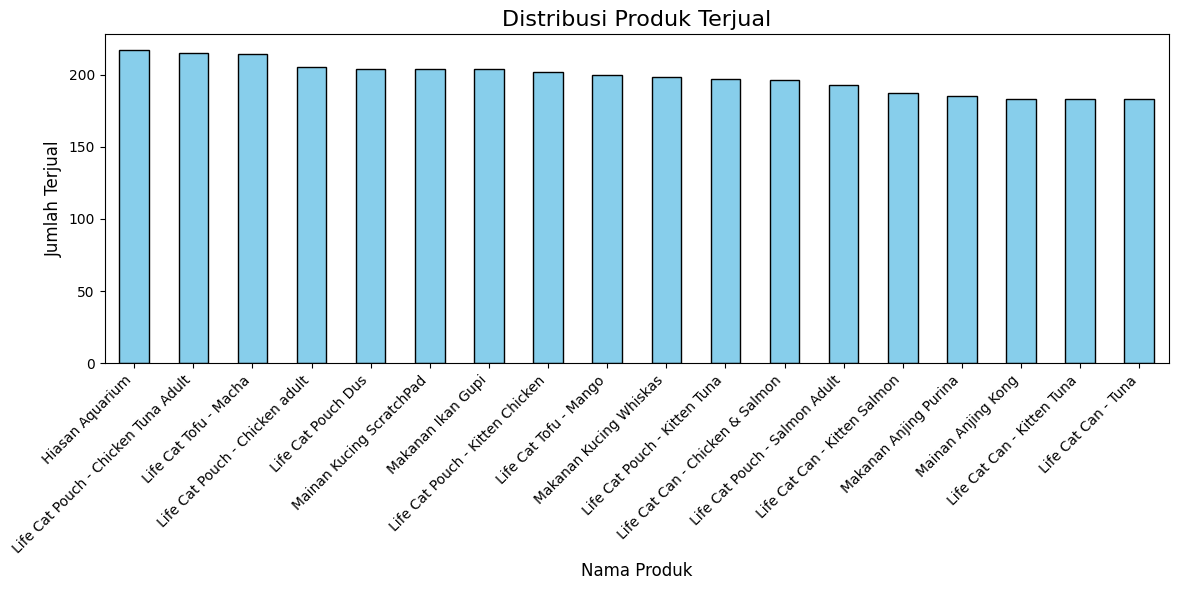

In [7]:
# Combine all product columns into a single series
all_products = pd.concat([data['produk1'], data['produk2'], data['produk3'], data['produk4']])
product_counts = all_products.value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
product_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribusi Produk Terjual', fontsize=16)
plt.xlabel('Nama Produk', fontsize=12)
plt.ylabel('Jumlah Terjual', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


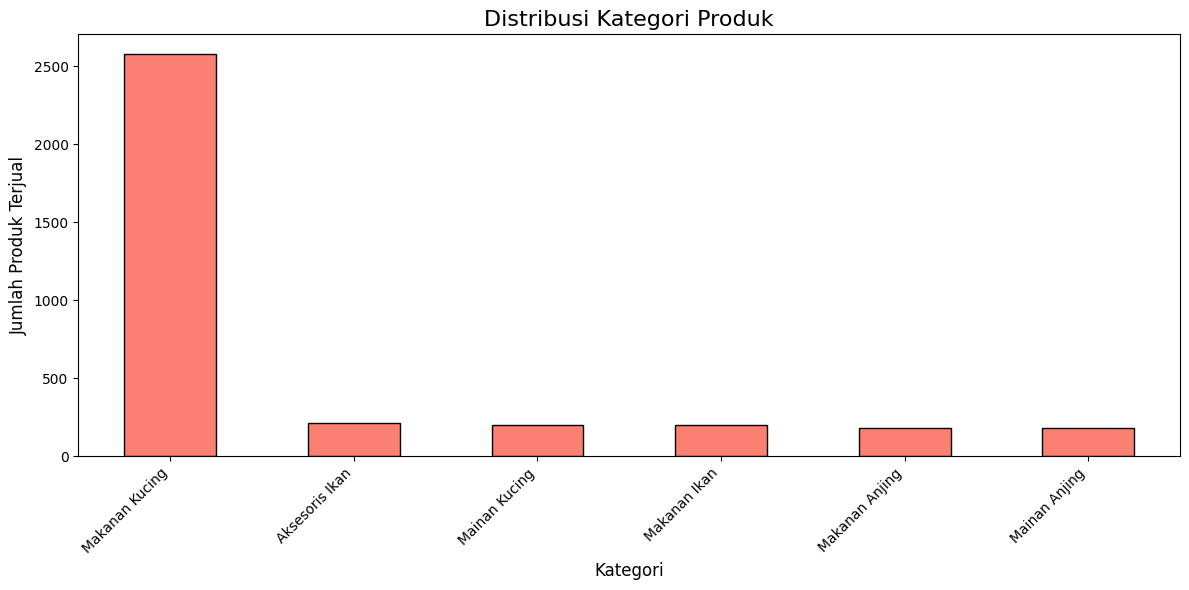

In [8]:
# Combine all category columns into a single series
all_categories = pd.concat([data['kategori1'], data['kategori2'], data['kategori3'], data['kategori4']])
category_counts = all_categories.value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
category_counts.plot(kind='bar', color='salmon', edgecolor='black')
plt.title('Distribusi Kategori Produk', fontsize=16)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Jumlah Produk Terjual', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-9-bf23f08e02e9>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=data['metode_pembayaran'], palette="viridis", order=data['metode_pembayaran'].value_counts().index)


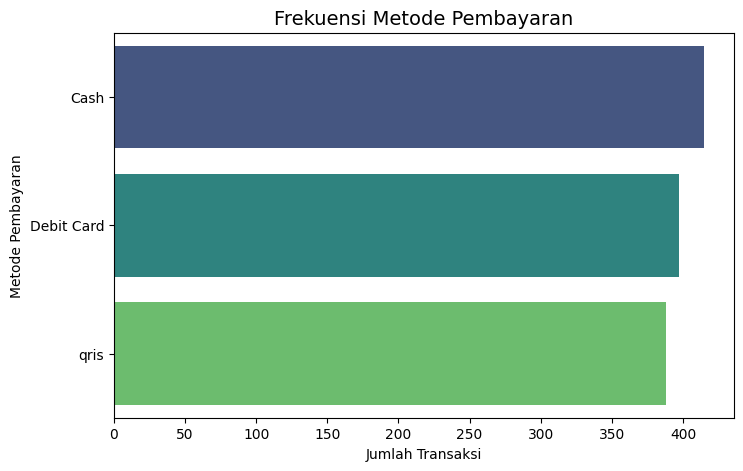

In [9]:
# Plot 3: Payment method frequency
plt.figure(figsize=(8, 5))
sns.countplot(y=data['metode_pembayaran'], palette="viridis", order=data['metode_pembayaran'].value_counts().index)
plt.title("Frekuensi Metode Pembayaran", fontsize=14)
plt.xlabel("Jumlah Transaksi")
plt.ylabel("Metode Pembayaran")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 1200x600 with 0 Axes>

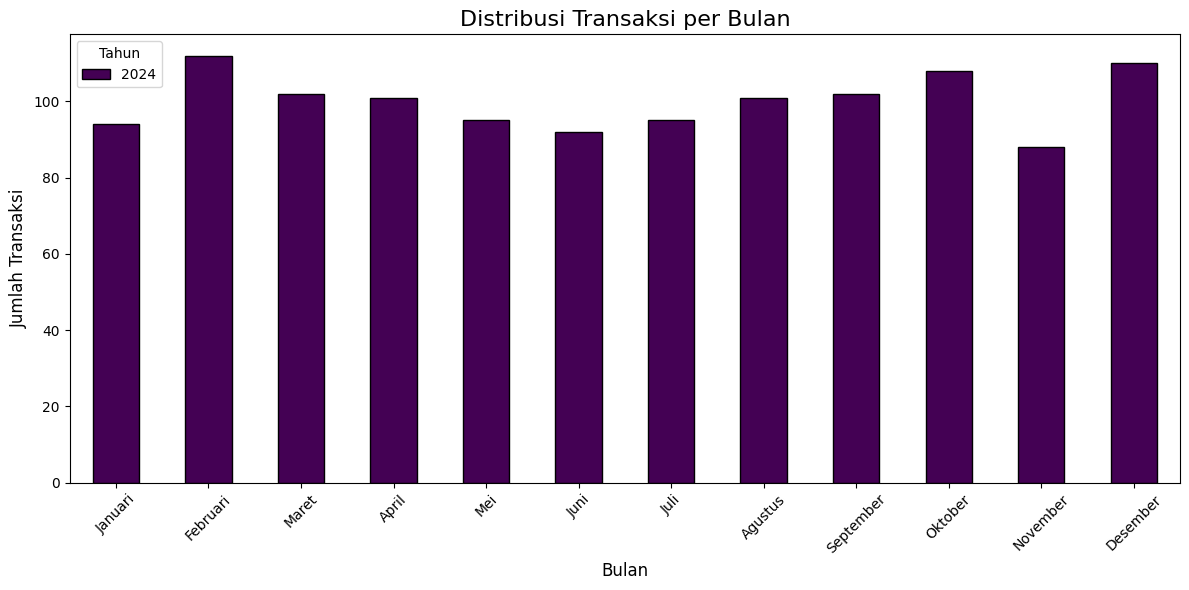

In [10]:
# Convert 'tanggal_transaksi' to datetime format
data['tanggal_transaksi'] = pd.to_datetime(data['tanggal_transaksi'])

# Extract month and year for grouping
data['bulan'] = data['tanggal_transaksi'].dt.month
data['tahun'] = data['tanggal_transaksi'].dt.year

# Group by month and count transactions
monthly_transactions = data.groupby(['tahun', 'bulan']).size().reset_index(name='jumlah_transaksi')

# Pivot for better visualization
monthly_pivot = monthly_transactions.pivot(index='bulan', columns='tahun', values='jumlah_transaksi')

# Plot the distribution of transactions per month
plt.figure(figsize=(12, 6))
monthly_pivot.plot(kind='bar', figsize=(12, 6), colormap='viridis', edgecolor='black')
plt.title('Distribusi Transaksi per Bulan', fontsize=16)
plt.xlabel('Bulan', fontsize=12)
plt.ylabel('Jumlah Transaksi', fontsize=12)
plt.xticks(ticks=range(0, 12), labels=[
    'Januari', 'Februari', 'Maret', 'April', 'Mei', 'Juni',
    'Juli', 'Agustus', 'September', 'Oktober', 'November', 'Desember'
], rotation=45)
plt.legend(title='Tahun')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


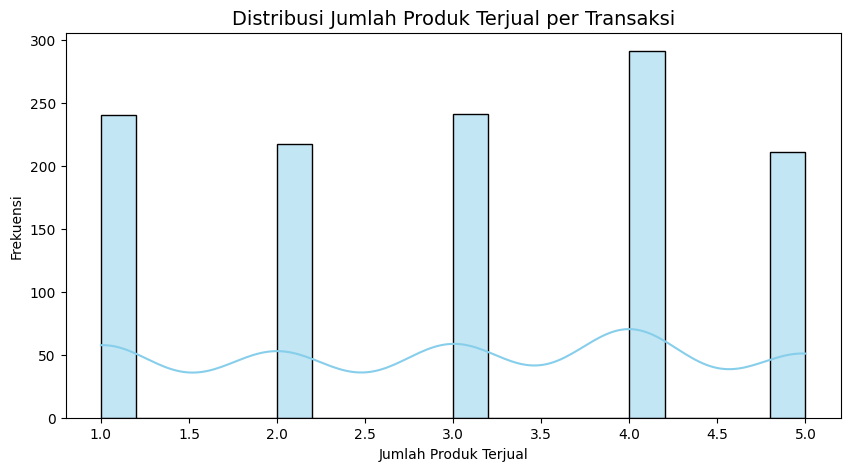

In [ ]:
# Exploratory Data Analysis
# Plot 1: Distribution of 'jumlah_terjual'
plt.figure(figsize=(10, 5))
sns.histplot(data['jumlah_terjual'], bins=20, kde=True, color="skyblue")
plt.title("Distribusi Jumlah Produk Terjual per Transaksi", fontsize=14)
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Frekuensi")
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


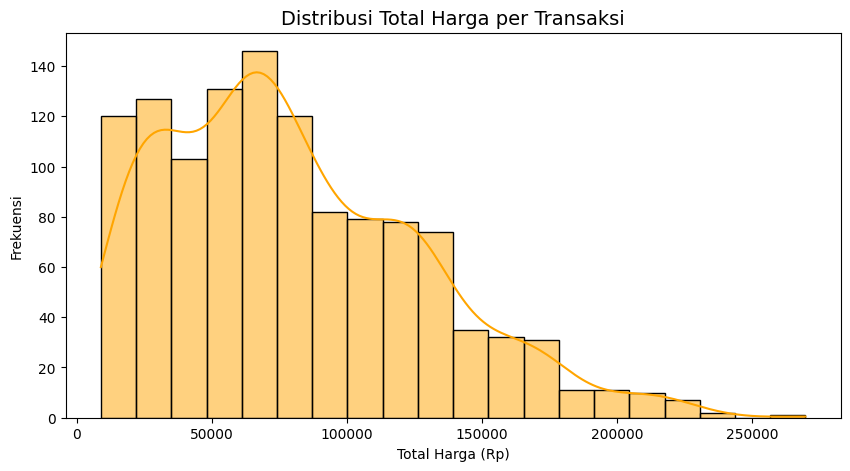

In [ ]:
# Plot 2: Distribution of 'total_harga'
plt.figure(figsize=(10, 5))
sns.histplot(data['total_harga'], bins=20, kde=True, color="orange")
plt.title("Distribusi Total Harga per Transaksi", fontsize=14)
plt.xlabel("Total Harga (Rp)")
plt.ylabel("Frekuensi")
plt.show()

In [ ]:
# Detecting outliers using IQR
# Outliers in 'jumlah_terjual'
q1_jumlah, q3_jumlah = data['jumlah_terjual'].quantile([0.25, 0.75])
iqr_jumlah = q3_jumlah - q1_jumlah
outlier_jumlah = data[
    (data['jumlah_terjual'] < (q1_jumlah - 1.5 * iqr_jumlah)) | (data['jumlah_terjual'] > (q3_jumlah + 1.5 * iqr_jumlah))
]

# Outliers in 'total_harga'
q1_harga, q3_harga = data['total_harga'].quantile([0.25, 0.75])
iqr_harga = q3_harga - q1_harga
outlier_harga = data[
    (data['total_harga'] < (q1_harga - 1.5 * iqr_harga)) | (data['total_harga'] > (q3_harga + 1.5 * iqr_harga))
]

# Display results
print("\nJumlah Transaksi dengan Outlier pada 'jumlah_terjual':", len(outlier_jumlah))
print("Jumlah Transaksi dengan Outlier pada 'total_harga':", len(outlier_harga))



Jumlah Transaksi dengan Outlier pada 'jumlah_terjual': 0
Jumlah Transaksi dengan Outlier pada 'total_harga': 9


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


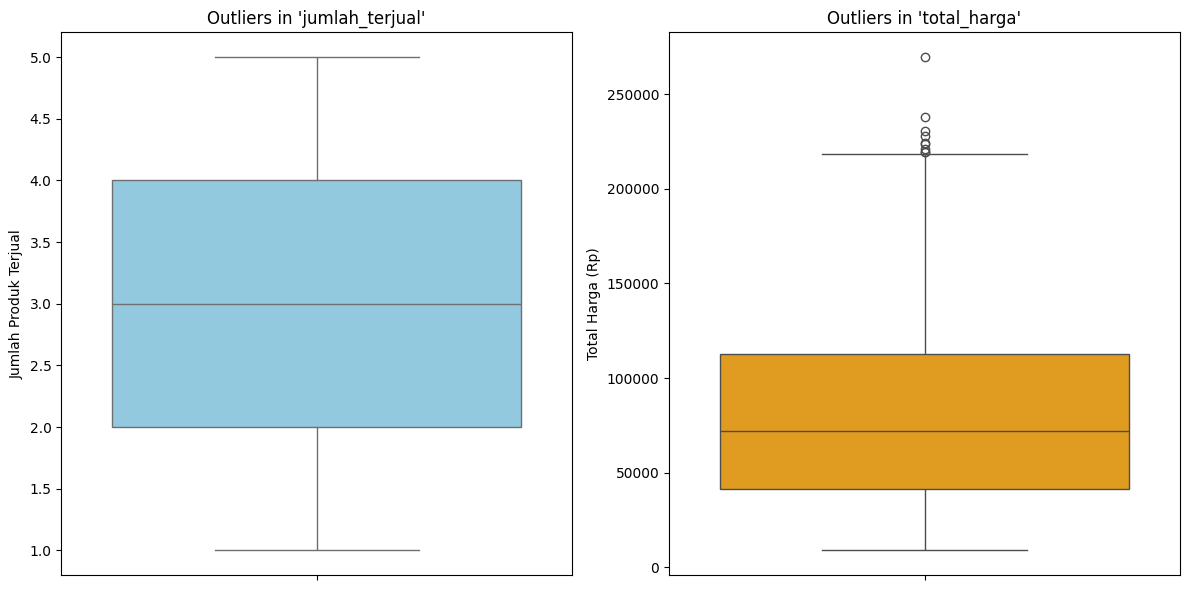

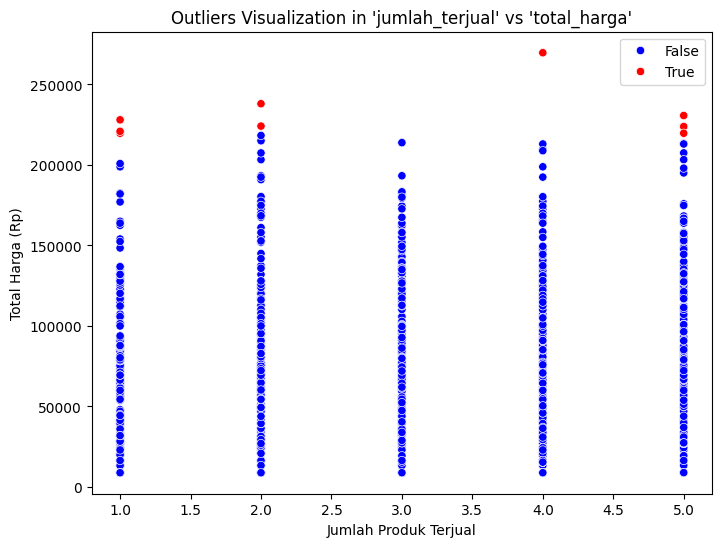

In [ ]:
# prompt: buatkan visualisasi untuk outliernya

import matplotlib.pyplot as plt

# Create box plots to visualize outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(y=data['jumlah_terjual'], color="skyblue")
plt.title("Outliers in 'jumlah_terjual'")
plt.ylabel("Jumlah Produk Terjual")

plt.subplot(1, 2, 2)
sns.boxplot(y=data['total_harga'], color="orange")
plt.title("Outliers in 'total_harga'")
plt.ylabel("Total Harga (Rp)")

plt.tight_layout()
plt.show()


# Create scatter plot to visualize outliers in relation to each other
plt.figure(figsize=(8, 6))
sns.scatterplot(x='jumlah_terjual', y='total_harga', data=data, hue=data.index.isin(outlier_jumlah.index) | data.index.isin(outlier_harga.index), palette={True: 'red', False: 'blue'})
plt.title("Outliers Visualization in 'jumlah_terjual' vs 'total_harga'")
plt.xlabel("Jumlah Produk Terjual")
plt.ylabel("Total Harga (Rp)")
plt.show()

**DATA PREPARATION**

In [ ]:
# Fill missing values with 0
data.fillna(0, inplace=True)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


id_transaksi tanggal_transaksi  jumlah_terjual  \
0        JQeYXXi6        2024-06-29               3   
1        AQ9BxDDX        2024-02-17               3   
2        s7ETKTQ8        2024-11-01               1   
3        UEflcOAa        2024-06-25               1   
4        wSc48TrG        2024-01-08               5   
...           ...               ...             ...   
1195     do3EsNjE        2024-10-19               3   
1196     ZmybXgtd        2024-04-30               5   
1197     Y9mUXsQh        2024-07-21               4   
1198     qU6QYnxl        2024-04-28               5   
1199     e4rjQpDi        2024-03-06               1   

                              produk1       kategori1  harga1  \
0                  Life Cat Pouch Dus  Makanan Kucing  108000   
1                     Hiasan Aquarium  Aksesoris Ikan   15000   
2     Life Cat Can - Chicken & Salmon  Makanan Kucing   12000   
3               Life Cat Tofu - Mango  Makanan Kucing   55833   
4              Makanan Kucing Whiskas  Makanan Kucing   45000   
...                               ...             ...     ...   
1195     Life Cat Can - Kitten Salmon  Makanan Kucing   12024   
1196    Life Cat Pouch - Salmon Adult  Makanan Kucing    4453   
1197   Life Cat Pouch - Chicken adult  Makanan Kucing    4435   
1198     Life Cat Pouch - Kitten Tuna  Makanan Kucing    4435   
1199         Mainan Kucing ScratchPad   Mainan Kucing   25000   

                                  produk2       kategori2  harga2  \
0     Life Cat Pouch - Chicken Tuna Adult  Makanan Kucing    4500   
1                  Makanan Kucing Whiskas  Makanan Kucing   45000   
2                   Life Cat Tofu - Mango  Makanan Kucing   55833   
3                      Mainan Anjing Kong   Mainan Anjing   20000   
4                       Makanan Ikan Gupi    Makanan Ikan   35000   
...                                   ...             ...     ...   
1195      Life Cat Can - Chicken & Salmon  Makanan Kucing   12000   
1196                Life Cat Tofu - Macha  Makanan Kucing   55833   
1197                  Life Cat Can - Tuna  Makanan Kucing   11000   
1198                   Life Cat Pouch Dus  Makanan Kucing  108000   
1199                      Hiasan Aquarium  Aksesoris Ikan   15000   

                           produk3       kategori3   harga3  \
0                                0               0      0.0   
1                                0               0      0.0   
2            Makanan Anjing Purina  Makanan Anjing  50000.0   
3                                0               0      0.0   
4       Life Cat Can - Kitten Tuna  Makanan Kucing  12000.0   
...                            ...             ...      ...   
1195    Life Cat Can - Kitten Tuna  Makanan Kucing  12000.0   
1196  Life Cat Can - Kitten Salmon  Makanan Kucing  12024.0   
1197                             0               0      0.0   
1198            Mainan Anjing Kong   Mainan Anjing  20000.0   
1199  Life Cat Pouch - Kitten Tuna  Makanan Kucing   4435.0   

                            produk4       kategori4   harga4  total_harga  \
0                                 0               0      0.0       112500   
1                                 0               0      0.0        60000   
2               Life Cat Can - Tuna  Makanan Kucing  11000.0       128833   
3                                 0               0      0.0        75833   
4          Mainan Kucing ScratchPad   Mainan Kucing  25000.0       117000   
...                             ...             ...      ...          ...   
1195  Life Cat Pouch - Salmon Adult  Makanan Kucing   4453.0        40477   
1196                              0               0      0.0        72310   
1197                              0               0      0.0        15435   
1198                              0               0      0.0       132435   
1199                              0               0      0.0        44435   

     metode_pembayaran  
0           Debit Card  
1 

**MODELLING**

In [ ]:
# Instal paket yang dibutuhkan
!pip install pandas mlxtend

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Preprocessing: Combine product columns into transactions
# Ensure all values are strings to prevent type issues
transactions = data[['produk1', 'produk2', 'produk3', 'produk4']].fillna('').astype(str).apply(
    lambda row: [item for item in row if item.strip() != ''], axis=1)

# Encode transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_array, columns=te.columns_)

# Apply Apriori to find frequent itemsets with a minimum support of 0.01
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# Generate association rules with lift as the metric
num_itemsets = frequent_itemsets['itemsets'].apply(len).sum()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=num_itemsets)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Sort rules by lift to identify strong associations
rules_sorted = rules.sort_values(by='lift', ascending=False)

# Save rules to a file for further analysis
rules_sorted.to_csv('association_rules.csv', index=False)

# Display top rules
print(rules_sorted.head())


                                         antecedents consequents  \
4  (Life Cat Pouch - Chicken Tuna Adult, Life Cat...         (0)   
6         (Makanan Ikan Gupi, Life Cat Tofu - Mango)         (0)   
5  (Mainan Kucing ScratchPad, Life Cat Pouch - Ch...         (0)   
2                  (Life Cat Pouch - Kitten Chicken)         (0)   
0              (Life Cat Pouch - Chicken Tuna Adult)         (0)   

   antecedent support  consequent support   support  confidence      lift  \
4            0.022500              0.6875  0.015000    0.666667  0.969697   
6            0.017500              0.6875  0.011667    0.666667  0.969697   
5            0.019167              0.6875  0.012500    0.652174  0.948617   
2            0.168333              0.6875  0.105000    0.623762  0.907291   
0            0.179167              0.6875  0.110000    0.613953  0.893023   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
4               1.0 -0.000469    0.937500      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# prompt: tolong simpan file association_rules.csv data diatas kedalah gdrive

# Save the DataFrame to your Google Drive
rules_sorted.to_csv('/content/drive/MyDrive/association_rules.csv', index=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


# Prepare transaction data
products_columns = ['produk1', 'produk2', 'produk3', 'produk4']
transactions = data[products_columns].fillna('').astype(str).apply(lambda row: ', '.join(row).split(', '), axis=1) # dilakukan konversi ke string


# Transaction encoding
te = TransactionEncoder()
te_data = te.fit(transactions).transform(transactions)
basket = pd.DataFrame(te_data, columns=te.columns_)

# Apply Apriori
frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)
num_itemsets = frequent_itemsets['itemsets'].apply(len).sum()
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=num_itemsets)
# rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

# Save rules to a file
rules_sorted = rules.sort_values(by='lift', ascending=False)
rules_sorted.to_csv('association_rules.csv', index=False)
print(rules_sorted)


                                         antecedents consequents  \
4  (Life Cat Pouch - Chicken Tuna Adult, Life Cat...         (0)   
6         (Makanan Ikan Gupi, Life Cat Tofu - Mango)         (0)   
5  (Mainan Kucing ScratchPad, Life Cat Pouch - Ch...         (0)   
2                  (Life Cat Pouch - Kitten Chicken)         (0)   
0              (Life Cat Pouch - Chicken Tuna Adult)         (0)   
3                                (Makanan Ikan Gupi)         (0)   
1                   (Life Cat Pouch - Chicken adult)         (0)   

   antecedent support  consequent support   support  confidence      lift  \
4            0.022500              0.6875  0.015000    0.666667  0.969697   
6            0.017500              0.6875  0.011667    0.666667  0.969697   
5            0.019167              0.6875  0.012500    0.652174  0.948617   
2            0.168333              0.6875  0.105000    0.623762  0.907291   
0            0.179167              0.6875  0.110000    0.613953  0.893

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# prompt: tolong buatkan langkah selanjutnya menggunakan content-besed filtering

import pandas as pd

# Load the association rules
rules = pd.read_csv('/content/drive/MyDrive/association_rules.csv')

def recommend_products(purchased_products, rules_df):
    """
    Recommends products based on purchased products and association rules.

    Args:
        purchased_products: A list of products purchased by the user.
        rules_df: The DataFrame containing association rules.

    Returns:
        A list of recommended products.
    """
    recommended_products = set()

    for index, row in rules_df.iterrows():
        antecedents = eval(row['antecedents']) # Use eval() carefully, ensure your data is safe
        consequents = eval(row['consequents']) # Use eval() carefully

        if all(item in purchased_products for item in antecedents):
            recommended_products.update(consequents)

    # Remove already purchased items from recommendations
    recommended_products = list(recommended_products - set(purchased_products))
    return recommended_products


# Example usage
user_purchases = ['Life Cat Pouch - Chicken adult', 'Mainan Kucing ScratchPad']  # Replace with actual user purchases
recommendations = recommend_products(user_purchases, rules)

print("Recommendations for", user_purchases, ": ", recommendations)

Recommendations for ['Life Cat Pouch - Chicken adult', 'Mainan Kucing ScratchPad'] :  ['0']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(rules[['antecedents', 'consequents']].head())

                                         antecedents       consequents
0  frozenset({'Life Cat Pouch - Chicken Tuna Adul...  frozenset({'0'})
1  frozenset({'Makanan Ikan Gupi', 'Life Cat Tofu...  frozenset({'0'})
2  frozenset({'Mainan Kucing ScratchPad', 'Life C...  frozenset({'0'})
3     frozenset({'Life Cat Pouch - Kitten Chicken'})  frozenset({'0'})
4  frozenset({'Life Cat Pouch - Chicken Tuna Adul...  frozenset({'0'})


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


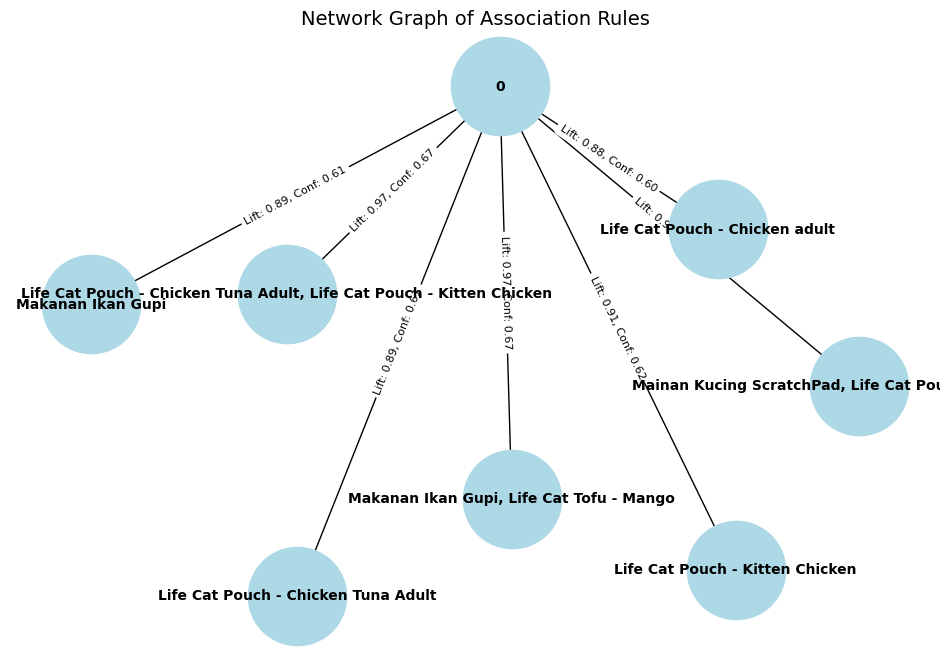

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a graph
G = nx.DiGraph()

# Add nodes and edges
for _, rule in rules_sorted.iterrows():
    G.add_edge(
        ', '.join(list(rule['antecedents'])),
        ', '.join(list(rule['consequents'])),
        weight=rule['lift'],
        label=f"Lift: {rule['lift']:.2f}, Conf: {rule['confidence']:.2f}"
    )

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=1, iterations=50)

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=5000, node_color='lightblue')
nx.draw_networkx_edges(G, pos, arrowstyle='-|>', arrowsize=15)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black', font_weight='bold')

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

plt.title("Network Graph of Association Rules", fontsize=14)
plt.axis('off')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


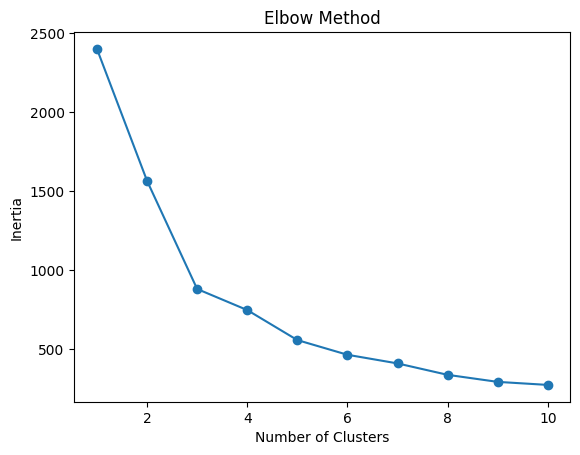

   jumlah_terjual  total_harga  Cluster
0               3       112500        0
1               3        60000        1
2               1       128833        2
3               1        75833        2
4               5       117000        0


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Select numerical data for clustering
numerical_columns = ['jumlah_terjual', 'total_harga']
numerical_data = data[numerical_columns]

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Apply K-Means
inertia = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

# Elbow method plot
plt.plot(range_clusters, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Optimal K (e.g., 3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Save clustered data
data.to_csv('clustered_data.csv', index=False)
print(data[['jumlah_terjual', 'total_harga', 'Cluster']].head())


In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Prepare features (X) and target (y)
# Contoh target: metode_pembayaran
X = data[['jumlah_terjual', 'total_harga']]
y = data['metode_pembayaran']

# Encode target variable
y_encoded = pd.factorize(y)[0]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate model
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualize the tree
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


              precision    recall  f1-score   support

           0       0.28      0.35      0.31       118
           1       0.35      0.29      0.32       129
           2       0.36      0.34      0.35       113

    accuracy                           0.33       360
   macro avg       0.33      0.33      0.33       360
weighted avg       0.33      0.33      0.33       360

|--- total_harga <= 158217.50
|   |--- total_harga <= 64578.00
|   |   |--- total_harga <= 49444.00
|   |   |   |--- total_harga <= 45902.50
|   |   |   |   |--- total_harga <= 35661.50
|   |   |   |   |   |--- total_harga <= 34402.50
|   |   |   |   |   |   |--- total_harga <= 30717.50
|   |   |   |   |   |   |   |--- total_harga <= 29476.50
|   |   |   |   |   |   |   |   |--- total_harga <= 15476.50
|   |   |   |   |   |   |   |   |   |--- jumlah_terjual <= 3.50
|   |   |   |   |   |   |   |   |   |   |--- jumlah_terjual <= 1.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


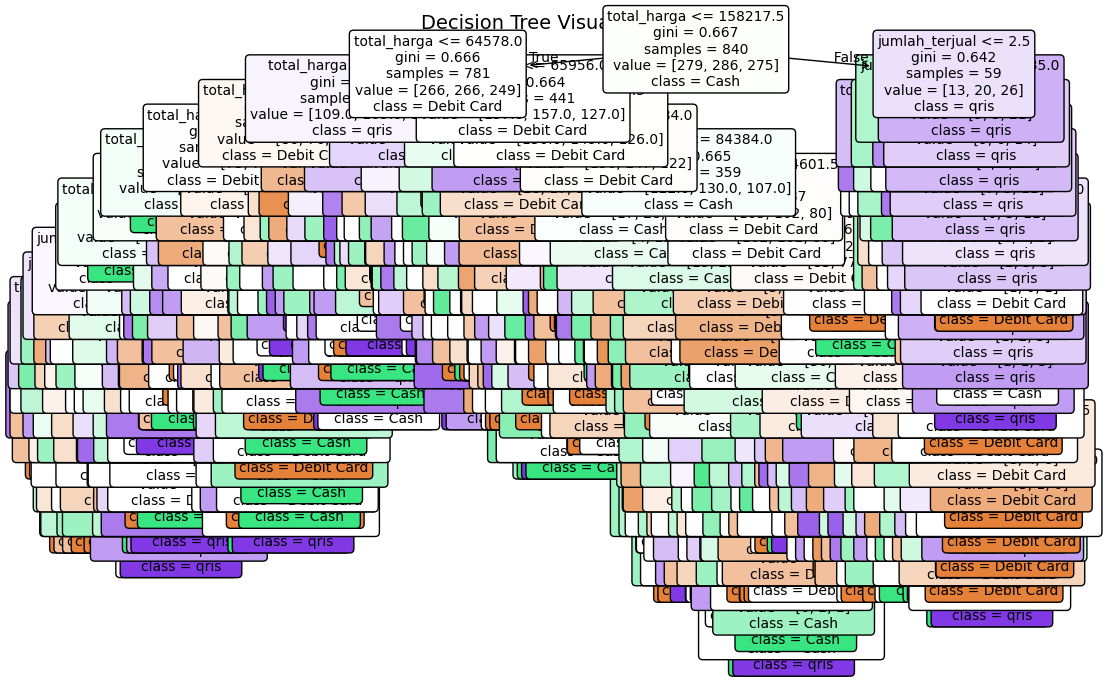

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=pd.factorize(y)[1],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization", fontsize=14)
plt.show()


In [ ]:
# import pandas as pd
# from mlxtend.frequent_patterns import apriori, association_rules
# from mlxtend.preprocessing import TransactionEncoder

# # Combine product columns, konversi ke string sebelum di join
# products_columns = ['produk1', 'produk2', 'produk3', 'produk4']
# transactions = data[products_columns].fillna('').astype(str).apply(lambda row: ', '.join(row).split(', '), axis=1) # dilakukan konversi ke string

# # Encode transactions
# te = TransactionEncoder()
# te_data = te.fit(transactions).transform(transactions)
# basket = pd.DataFrame(te_data, columns=te.columns_)

# # Frequent itemsets
# frequent_itemsets = apriori(basket, min_support=0.01, use_colnames=True)

# # Association rules
# num_itemsets = frequent_itemsets['itemsets'].apply(len).sum()

# rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6, num_itemsets=num_itemsets)
# # rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
# rules_sorted = rules.sort_values(by="lift", ascending=False)

# # Save results
# rules_sorted.to_csv('petshop_rules.csv', index=False)
# print(rules_sorted.head())

                                         antecedents consequents  \
4  (Life Cat Pouch - Chicken Tuna Adult, Life Cat...         (0)   
6         (Makanan Ikan Gupi, Life Cat Tofu - Mango)         (0)   
5  (Mainan Kucing ScratchPad, Life Cat Pouch - Ch...         (0)   
2                  (Life Cat Pouch - Kitten Chicken)         (0)   
0              (Life Cat Pouch - Chicken Tuna Adult)         (0)   

   antecedent support  consequent support   support  confidence      lift  \
4            0.022500              0.6875  0.015000    0.666667  0.969697   
6            0.017500              0.6875  0.011667    0.666667  0.969697   
5            0.019167              0.6875  0.012500    0.652174  0.948617   
2            0.168333              0.6875  0.105000    0.623762  0.907291   
0            0.179167              0.6875  0.110000    0.613953  0.893023   

   representativity  leverage  conviction  zhangs_metric   jaccard  certainty  \
4               1.0 -0.000469    0.937500      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# # Perbaikan: Sesuaikan dengan nama kolom yang ada di dataset

# # Memastikan kolom yang relevan
# # Sesuaikan nama kolom sesuai dengan data yang benar
# if 'id_transaksi' in data.columns and 'produk1' in data.columns and 'produk2' in data.columns and 'produk3' in data.columns and 'produk4' in data.columns:
#     print("Kolom sesuai untuk analisis")
# else:
#     raise ValueError("Pastikan kolom 'id_transaksi', 'produk1', 'produk2', 'produk3', dan 'produk4' ada di dataset Anda")

# # Membuat tabel pivot untuk one-hot encoding
# basket = data.pivot_table(
#     index='id_transaksi',  # Sesuaikan nama kolom index
#     columns=['produk1','produk2','produk3','produk4'], # Sesuaikan nama kolom columns dengan lebih dari 1 kolom yang dipivot
#     values='jumlah_terjual',  # Sesuaikan nama kolom values dengan kolom yang benar
#     aggfunc='sum',  # Agregasi berdasarkan jumlah barang
# ).fillna(0)  # Mengisi nilai kosong dengan 0

# # Mengonversi jumlah menjadi 1 (dibeli) atau 0 (tidak dibeli)
# basket = basket.applymap(lambda x: 1 if x > 0 else 0)

# # Menyimpan hasil one-hot encoding ke file
# basket.to_csv("basket_prepared.csv", index=True)

# # Menampilkan data hasil one-hot encoding
# print("Data one-hot encoding berhasil diproses:")
# print(basket.head())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-29-907ac1ea4a38>:19: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  basket = basket.applymap(lambda x: 1 if x > 0 else 0)


Kolom sesuai untuk analisis
Data one-hot encoding berhasil diproses:
produk1                      Hiasan Aquarium                         \
produk2      Life Cat Can - Chicken & Salmon                          
produk3                                    0 Makanan Kucing Whiskas   
produk4                                    0    Life Cat Can - Tuna   
id_transaksi                                                          
05fefhyf                                   0                      0   
05w2VpVJ                                   0                      0   
0IsUuWLX                                   0                      0   
0SC1DHin                                   0                      0   
0cbTfSQ4                                   0                      0   

produk1                                                                    \
produk2      Life Cat Can - Kitten Salmon                                   
produk3                                 0 Life Cat Pouch - Kitten 